In [1]:
import pandas as pd
import numpy as np
#from sklearn.neighbors import KNeighborsClassifier as KNC
#from sklearn.svm import SVC as SVC
#from sklearn.tree import DecisionTreeClassifier as DTC
#from sklearn.ensemble import GradientBoostingClassifier as GBC
#from sklearn.ensemble import RandomForestClassifier as RFC
#from sklearn.linear_model import SGDClassifier as SGDC
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from collections import defaultdict
import collections as col
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#transactions = pd.read_csv("transactions.csv").values
#customers_gender = pd.read_csv("customers_gender_train.csv")

In [3]:
#am_save = np.array(amounts)

In [4]:
#np.save("amounts",am_save)

In [5]:
#code_save = np.array(mcc_codes)

In [6]:
#np.save("mcc_codes",code_save)

In [7]:
#amounts = list(np.load("amounts.npy"))

In [8]:
#mcc_codes = list(np.load("mcc_codes.npy"))

In [9]:
amounts_1 = np.load("amounts.npy")

In [10]:
amounts_1 = list(amounts_1)

In [11]:
mcc_codes = np.load("mcc_codes.npy")

In [12]:
amounts = []
for i in range(len(amounts_1)):
    amounts.append(abs(amounts_1[i]))

In [13]:
mcc_and_amounts = list(zip (mcc_codes, amounts)) 

In [14]:
#mcc_and_amounts

In [15]:
mcc_counted = col.Counter(mcc_codes)

In [16]:
mcc_and_amounts = sorted(mcc_and_amounts) #напротив каждого mcc кода написана 1 из денег с этим mcc кодом

In [17]:
mcc_and_amounts

[(742, 505.32999999999998),
 (742, 898.37),
 (742, 1122.96),
 (742, 1527.22),
 (742, 1536.8800000000001),
 (742, 1572.1400000000001),
 (742, 1572.1400000000001),
 (742, 1796.73),
 (742, 2021.3199999999999),
 (742, 2201.0),
 (742, 2245.9200000000001),
 (742, 2245.9200000000001),
 (742, 2470.5100000000002),
 (742, 2470.5100000000002),
 (742, 2515.4299999999998),
 (742, 2560.3400000000001),
 (742, 2672.6399999999999),
 (742, 2695.0999999999999),
 (742, 2919.6900000000001),
 (742, 3144.2800000000002),
 (742, 3368.8699999999999),
 (742, 3368.8699999999999),
 (742, 3368.8699999999999),
 (742, 3641.0799999999999),
 (742, 3705.7600000000002),
 (742, 3818.0599999999999),
 (742, 3818.0599999999999),
 (742, 3850.1700000000001),
 (742, 3862.98),
 (742, 3952.3600000000001),
 (742, 4020.1900000000001),
 (742, 4042.6500000000001),
 (742, 4154.9399999999996),
 (742, 4154.9399999999996),
 (742, 4446.9099999999999),
 (742, 4491.8299999999999),
 (742, 4604.1300000000001),
 (742, 4604.1300000000001),
 (74

In [18]:
mcc_counted #подсчитано число каждого mcc кода

Counter({742: 275,
         1711: 113,
         1731: 81,
         1799: 116,
         2741: 53,
         3000: 3233,
         3351: 60,
         3501: 526,
         4111: 2894,
         4112: 13079,
         4121: 4705,
         4131: 300,
         4214: 385,
         4215: 572,
         4411: 109,
         4511: 5630,
         4722: 2587,
         4784: 1268,
         4789: 2356,
         4812: 13945,
         4814: 987181,
         4816: 7476,
         4829: 624643,
         4899: 1836,
         4900: 12037,
         5013: 453,
         5039: 446,
         5044: 84,
         5045: 598,
         5047: 101,
         5065: 226,
         5072: 121,
         5074: 219,
         5085: 151,
         5094: 157,
         5099: 307,
         5111: 163,
         5122: 397,
         5131: 114,
         5137: 150,
         5169: 113,
         5172: 124,
         5192: 479,
         5193: 314,
         5199: 237,
         5200: 22991,
         5211: 29404,
         5231: 582,
         5251: 3980,

In [19]:
sorted_mcc = sorted(list(mcc_codes))

In [21]:
diff_mcc = [sorted_mcc[0]]
for i in range(1,len(mcc_codes)):
    if sorted_mcc[i] != sorted_mcc[i-1]:
        diff_mcc.append(sorted_mcc[i])

In [22]:
#занесу в список, сколько раз встречается тот или иной мсс код

In [23]:
how_many_times = []
for el in diff_mcc:
    how_many_times.append(mcc_counted[el])

In [24]:
amounts_sorted = []
for i in range(len(mcc_and_amounts)):
    amounts_sorted.append(mcc_and_amounts[i][1])

In [25]:
def mass_mass(number,times):
    m = []
    s = 0
    for i in range(len(times)):
        s = s + times[i]
        m.append(number[(s - times[i]):s])
    return m

In [26]:
x = mass_mass(amounts_sorted, how_many_times)

In [28]:
for i in range(len(x)):
    S = 0
    for j in range(len(x[i])):
        S = S+x[i][j]
    x[i] = S

In [36]:
len(diff_mcc)

184

In [37]:
b = list(zip(diff_mcc,x))

In [38]:
sorted_by_money = sorted(list(zip(x,diff_mcc)), reverse =True)

In [39]:
max(sorted_by_money)

(228800782707.83353, 6011)

In [40]:
#amounts = list(amounts)

In [76]:
s = 0
for i in range(len(amounts)):
    s = s+amounts[i]
    

In [88]:
min(sorted_by_money)[0]/s * 10**2

0.00019049648002984727

In [43]:
summa = 0
for i in range(len(sorted_by_money)):
    summa = summa + sorted_by_money[i][0]
    if summa/s >=0.95:
        print (summa/s, i, sorted_by_money[i][0], sorted_by_money[i][1])
        break

0.950058490575 18 1152805874.3 3000


In [44]:
my_codes = []
for i in range(19):
    my_codes.append(sorted_by_money[i])

In [45]:
my_codes

[(228800782707.83353, 6011),
 (139469155206.23132, 6010),
 (115063274528.59424, 4829),
 (12689558105.289621, 5411),
 (4735848529.5594416, 4814),
 (3114195624.9101167, 5541),
 (2421963879.7699227, 5499),
 (2161860630.1800022, 5691),
 (2119749111.4900131, 6012),
 (1909525455.7200272, 5331),
 (1793456084.2300274, 5812),
 (1659584667.5100148, 5912),
 (1473465329.8499959, 5722),
 (1454125905.2500031, 5211),
 (1410278707.3400035, 5999),
 (1394342820.5699964, 5712),
 (1361641140.970001, 4511),
 (1354955014.5000062, 5661),
 (1152805874.3000009, 3000)]

In [46]:
my_codes_1 = my_codes

In [47]:
for i in range(len(my_codes_1)):
    my_codes_1[i]=list(my_codes_1[i])

In [48]:
for i in range(len(my_codes_1)):
    my_codes_1[i][0],my_codes_1[i][1] = my_codes_1[i][1],my_codes_1[i][0]

In [49]:
my_codes_1

[[6011, 228800782707.83353],
 [6010, 139469155206.23132],
 [4829, 115063274528.59424],
 [5411, 12689558105.289621],
 [4814, 4735848529.5594416],
 [5541, 3114195624.9101167],
 [5499, 2421963879.7699227],
 [5691, 2161860630.1800022],
 [6012, 2119749111.4900131],
 [5331, 1909525455.7200272],
 [5812, 1793456084.2300274],
 [5912, 1659584667.5100148],
 [5722, 1473465329.8499959],
 [5211, 1454125905.2500031],
 [5999, 1410278707.3400035],
 [5712, 1394342820.5699964],
 [4511, 1361641140.970001],
 [5661, 1354955014.5000062],
 [3000, 1152805874.3000009]]

In [71]:
dengi = 0
for i in range(4):
    dengi += my_codes_1[i][1]

In [80]:
s

553166541363.33386

In [ ]:
'''
В процессе анализа имеющиxся в нашем распоряжении транзакций (около 7 млн), общий оборот которых составляет более 
553 млрд рублей, были сделаны следующие выводы:
1) 89,7% общего оборота по транзакциям связано только с 4 кодами категории продавца (mcc-кодами):
    6011 (~41.36% от общего оборота) - снятие наличности автоматически
    6010 (~25.21% от общего оборота) - снятие наличности вручную
    4829 (~20.8% от общего оборота) - денежные переводы
    5411 (~2.29% от общего оборота) - бакалейные магазины, супермаркеты
Также приведен график, на котором указано, какие суммы приходятся на каждый из наиболее "популярных" mcc-кодов
2) Наименьшая сумма по транзакциям приходится на государственные почтовые услуги (0.00019% от общего оборота, 
mcc-код: 9402)
3) Среди транзакций с наиболее "популярными" mcc-кодами выделены транзакции, связанные как с расходами ("отрицальные"
транзакции), так и с доходами ("положительные" транзакции) клиента, построены графики
'''

[41.362006845882483,
 25.212868960312701,
 20.800837708840699,
 2.2939851123343336,
 0.85613430593388251,
 0.56297613684928816,
 0.43783629317144751,
 0.39081550826481332,
 0.38320269809986718,
 0.34519901565517902,
 0.32421629837008525,
 0.30001537392695576,
 0.26636920704178785,
 0.2628730764637654,
 0.25494649475079084,
 0.25206564683639399,
 0.24615392276150708,
 0.24494522231235916,
 0.20840122966562591]

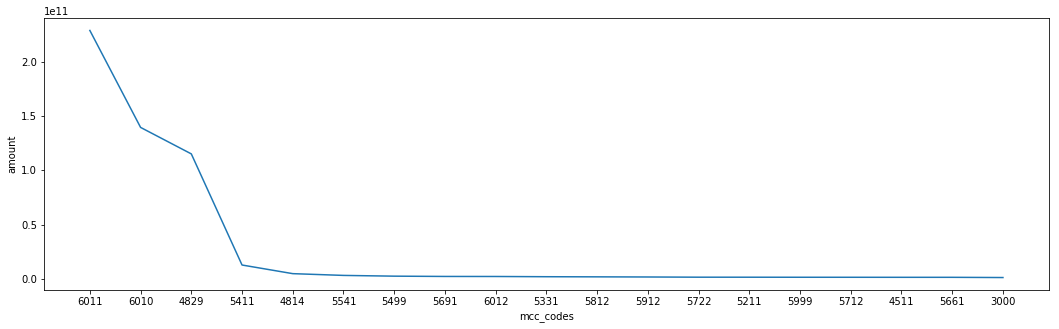

In [50]:
p = [el[0] for el in my_codes_1]
q = [el[1] for el in my_codes_1]
plt.figure(figsize=(18,5))
plt.plot(q)
plt.xticks(range(len(p)), p)
plt.xlabel('mcc_codes')
plt.ylabel('amount')
plt.show()

In [ ]:
'''
6011 - обналичивание денег
6010 - снятие нал. вручную
4829 - ден. переводы
5411 - супермаркеты
4814 - телекоммуникационные услуги
5541 - станции техобслуживания
5499 - Различные продовольственные магазины
5691 - магазины мужской и женской одежды
6012 - Покупка товара или услуги в месте нахождения финансового учреждения
5331 - Торговые точки, предлагающие разнообразный, но ограниченный ассортимент товаров по низким ценам
5812 - места общественного питания, рестораны
5912 - аптеки
5722 - Бытовое оборудование
5211 - Лесо- и строительный материал
5999 - Различные магазины и специальные розничные магазины
5712 -     Оборудование, мебель и бытовые принадлежности (кроме электрооборудования)
4511 - Авиалинии, авиакомпании - нигде более не классифицированные
5661 -     Обувные магазины
3000 -  United Airlines
'''
#сколько пол. и отр. транз. на мсс код
#частые мсс для об., для топ

In [51]:
mcc_codes = list(mcc_codes)

In [52]:
per_cent = []
for i in range(len(my_codes)):
    per_cent.append(my_codes[i][1]*100/s)

In [53]:
sum(per_cent)

95.005849057473966

In [54]:
#сколько на каждый мсс код приходится отр. и пол. транзакций

In [55]:
my_mcc = []
for i in range(len(my_codes_1)):
    my_mcc.append(my_codes_1[i][0])

In [56]:
my_mcc

[6011,
 6010,
 4829,
 5411,
 4814,
 5541,
 5499,
 5691,
 6012,
 5331,
 5812,
 5912,
 5722,
 5211,
 5999,
 5712,
 4511,
 5661,
 3000]

In [57]:
codes_plus_money = list(zip(mcc_codes,amounts_1))

In [58]:
my_massive = [[] for i in range(len(my_mcc))]

In [59]:
for el in my_mcc:
    for i in range(len(amounts_1)):
        if codes_plus_money[i][0] == el:
            my_massive[my_mcc.index(el)].append(codes_plus_money[i][1])

In [60]:
my_massive

[[56147.889999999999,
  -4491.8299999999999,
  -44918.32,
  -4491.8299999999999,
  -145984.53,
  -898366.31000000006,
  22459.16,
  -44918.32,
  22459.16,
  -15721.41,
  22459.16,
  -11229.58,
  -188656.92000000001,
  -179673.26000000001,
  44918.32,
  -33688.739999999998,
  -89836.630000000005,
  -112295.78999999999,
  -89836.630000000005,
  -67377.470000000001,
  -11229.58,
  -33688.739999999998,
  -11229.58,
  -44918.32,
  -31442.82,
  -44918.32,
  -20213.240000000002,
  -20213.240000000002,
  -89836.630000000005,
  -4491.8299999999999,
  -33688.739999999998,
  -29196.91,
  22459.16,
  2245.9200000000001,
  3368.8699999999999,
  22459.16,
  22459.16,
  -15721.41,
  -33688.739999999998,
  -4491.8299999999999,
  -74115.220000000001,
  -22459.16,
  -449183.15000000002,
  -6737.75,
  -202132.42000000001,
  -44918.32,
  -56147.889999999999,
  -44918.32,
  -11229.58,
  -1122.96,
  -11229.58,
  -78607.050000000003,
  -404264.84000000003,
  -11229.58,
  2245.9200000000001,
  -6737.75,
  673

In [61]:
pros_and_cons = [[] for k in range(len(my_massive))]
for i in range(len(my_massive)):
    s = 0
    for j in range(len(my_massive[i])):
        if my_massive[i][j]>=0:
            s+=1
    pros_and_cons[i].append(s)
    pros_and_cons[i].append(len(my_massive[i])-s)

In [62]:
pros_and_cons

[[271875, 1175495],
 [1005423, 15623],
 [247, 624396],
 [795, 961065],
 [57, 987124],
 [563, 141262],
 [89, 335925],
 [580, 29122],
 [13828, 4424],
 [162, 127728],
 [49, 106805],
 [24, 134007],
 [151, 12982],
 [252, 29152],
 [514, 53646],
 [108, 8139],
 [241, 5389],
 [379, 20975],
 [99, 3134]]

In [63]:
my_mcc

[6011,
 6010,
 4829,
 5411,
 4814,
 5541,
 5499,
 5691,
 6012,
 5331,
 5812,
 5912,
 5722,
 5211,
 5999,
 5712,
 4511,
 5661,
 3000]

In [65]:
#графики по положительным и отрицальным транзакциям

In [66]:
pros = []
for i in range(len(pros_and_cons)):
    pros.append(pros_and_cons[i][0])

In [67]:
pros

[271875,
 1005423,
 247,
 795,
 57,
 563,
 89,
 580,
 13828,
 162,
 49,
 24,
 151,
 252,
 514,
 108,
 241,
 379,
 99]

In [68]:
cons = []
for i in range(len(pros_and_cons)):
    cons.append(pros_and_cons[i][1])

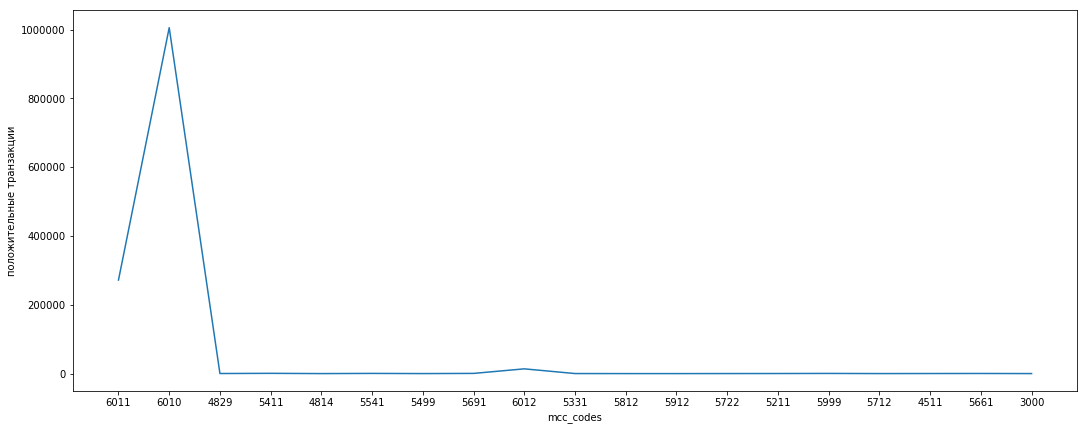

In [69]:
plt.figure(figsize=(18,7))
plt.plot(pros)
plt.xticks(range(19), my_mcc)
plt.xlabel('mcc_codes')
plt.ylabel('положительные транзакции')
plt.show()

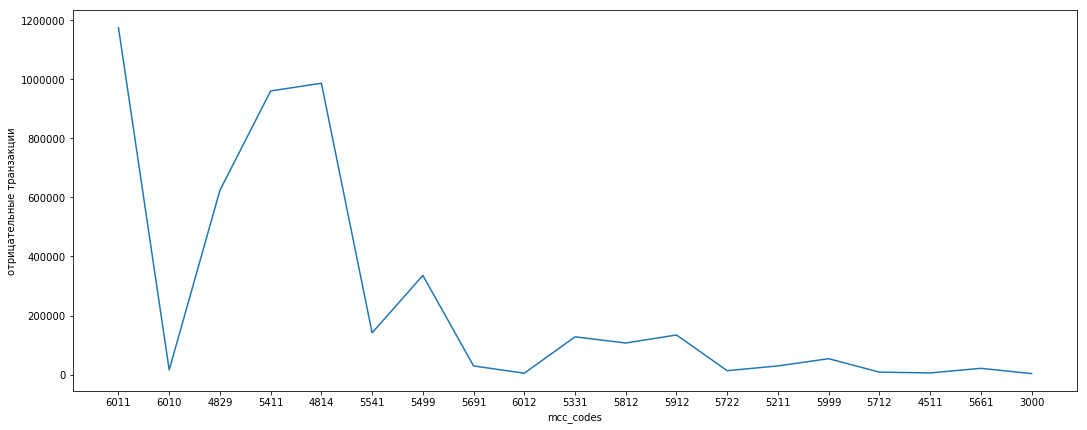

In [93]:
plt.figure(figsize=(18,7))
plt.plot(cons)
plt.xticks(range(19), my_mcc)
plt.xlabel('mcc_codes')
plt.ylabel('отрицательные транзакции')
plt.show()

In [ ]:
#чекнуть средние значения
#

In [ ]:
#3-4 предложения - вывод. Сколько то % приходится на то, на то

In [ ]:
#график от t y = moneyобщ

In [81]:
per_cent

[41.362006845882483,
 25.212868960312701,
 20.800837708840699,
 2.2939851123343336,
 0.85613430593388251,
 0.56297613684928816,
 0.43783629317144751,
 0.39081550826481332,
 0.38320269809986718,
 0.34519901565517902,
 0.32421629837008525,
 0.30001537392695576,
 0.26636920704178785,
 0.2628730764637654,
 0.25494649475079084,
 0.25206564683639399,
 0.24615392276150708,
 0.24494522231235916,
 0.20840122966562591]

In [16]:
customers_gender = customers_gender.sort_values(by = "customer_id")

In [17]:
customers_ids = customers_gender["customer_id"].values

In [18]:
customers_ids

array([    6815,    22899,    27914, ..., 99988578, 99991245, 99999680])

In [23]:
transactions_dict = defaultdict(list)
for row in transactions.itertuples():
    transactions_dict[row.customer_id].append(row)

In [29]:
transactions

In [30]:
len(customers_ids)

12000

In [31]:
#train, test, y_train, y_test = train_test_split(transactions, y, train_size = 0.7, random_state = 13)
#y - каждому id сопоставляется список транзакций

In [32]:
#сортировка по id
